# Average Directional Index (ADX)

https://stockcharts.com/school/doku.php?id=chart_school:technical_indicators:average_directional_index_adx

Average Directional Index (ADX) is technical indicator; as a result, the values range from 0 to 100. The ADX gives a signal of trend strength.

If ADX is below 20, the trend is weak; however, if ADX is above 50, the trend is strong. ADX does not tell you the direction of the trend and it only gives the strength of the trend.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AAPL'
start = '2018-08-01'
end = '2018-12-31'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-08-01,199.130005,201.759995,197.309998,201.500000,196.668900,67935700
2018-08-02,200.580002,208.380005,200.350006,207.389999,202.417679,62404000
2018-08-03,207.029999,208.740005,205.479996,207.990005,203.003281,33447400
2018-08-06,208.000000,209.250000,207.070007,209.070007,204.057388,25425400
2018-08-07,209.320007,209.500000,206.759995,207.110001,202.144379,25587400


No handles with labels found to put in legend.


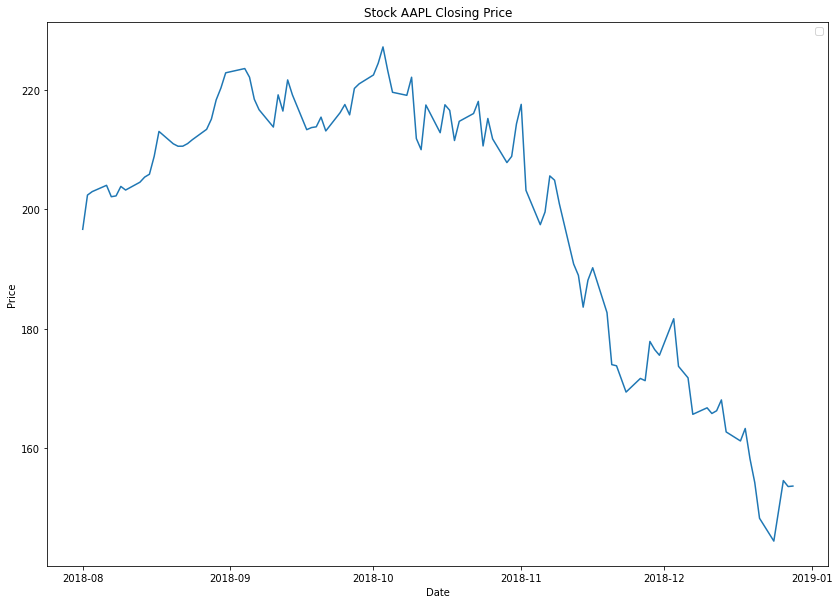

In [3]:
# Simple Line Chart
plt.figure(figsize=(14,10))
plt.plot(df['Adj Close'])
plt.legend(loc='best')
plt.title('Stock '+ symbol +' Closing Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [4]:
import talib as ta

In [5]:
adx = ta.ADX(df['High'], df['Low'],df['Adj Close'], timeperiod=14)
adx = adx.dropna()
adx

Date
2018-09-10    62.531612
2018-09-11    59.716715
2018-09-12    57.256111
2018-09-13    55.642428
2018-09-14    54.124606
                ...    
2018-12-21    46.144673
2018-12-24    47.633779
2018-12-26    47.605682
2018-12-27    47.579592
2018-12-28    47.128893
Length: 77, dtype: float64

No handles with labels found to put in legend.


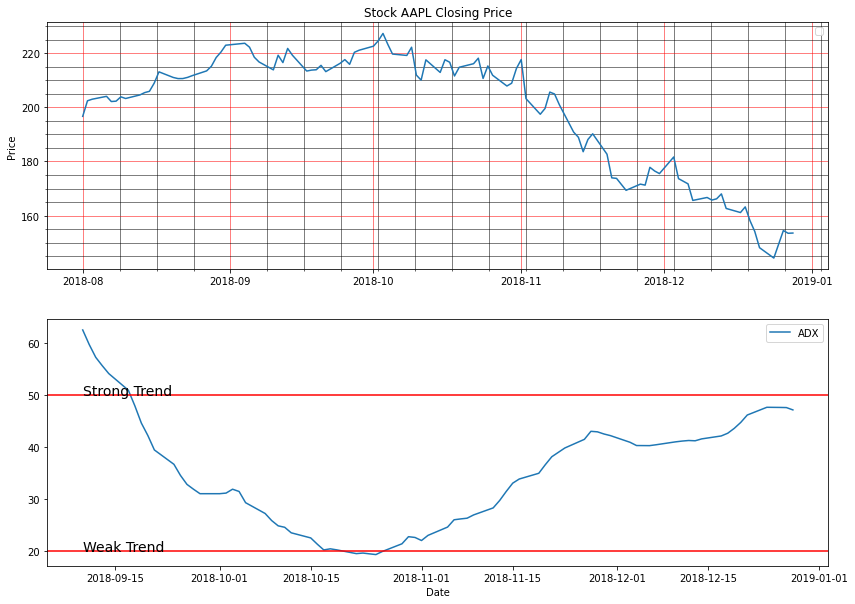

In [6]:
# Line Chart
fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(df['Adj Close'])
#ax1.grid(True, which='both')
ax1.grid(which='minor', linestyle='-', linewidth='0.5', color='black')
ax1.grid(which='major', linestyle='-', linewidth='0.5', color='red')
ax1.minorticks_on()
ax1.legend(loc='best')
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')


ax2 = plt.subplot(2, 1, 2)
ax2.plot(adx, '-', label='ADX')
ax2.text(s='Strong Trend', x=adx.index[0], y=50, fontsize=14)
ax2.text(s='Weak Trend', x=adx.index[0], y=20, fontsize=14)
ax2.axhline(y=50,color='r')
ax2.axhline(y=20,color='r')
ax2.set_xlabel('Date')
ax2.legend(loc='best')

## Candlestick with ADX

In [7]:
# Candlestick
dfc = df.copy()

from matplotlib import dates as mdates
import datetime as dt

dfc['ADX'] = ta.ADX(dfc['High'], dfc['Low'],dfc['Adj Close'], timeperiod=14)
dfc = dfc.dropna()
dfc.head()

,Open,High,Low,Close,Adj Close,Volume,ADX
Date,,,,,,,
2018-09-10,220.949997,221.850006,216.470001,218.330002,213.842728,39516500,62.531612
2018-09-11,218.009995,224.300003,216.559998,223.850006,219.249298,35749000,59.716715
2018-09-12,224.940002,225.000000,219.839996,221.070007,216.526428,49278700,57.256111
2018-09-13,223.520004,228.350006,222.570007,226.410004,221.756668,41706400,55.642428
2018-09-14,225.750000,226.839996,222.520004,223.839996,219.239487,31999300,54.124606


In [8]:
dfc = dfc.reset_index()
dfc['Date'] = mdates.date2num(dfc['Date'].astype(dt.date))
dfc.head()

TypeError: dtype '<class 'datetime.date'>' not understood

In [ ]:
from mpl_finance import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
#ax1.grid(which='minor', linestyle='-', linewidth='0.5', color='black')
#ax1.grid(which='major', linestyle='-', linewidth='0.5', color='red')
ax1.minorticks_on()
#ax1.legend(loc='best')
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')


ax2 = plt.subplot(2, 1, 2)
ax2.plot(adx, '-', label='ADX')
ax2.text(s='Strong Trend', x=adx.index[0], y=50, fontsize=14)
ax2.text(s='Weak Trend', x=adx.index[0], y=20, fontsize=14)
ax2.axhline(y=50,color='r')
ax2.axhline(y=20,color='r')
ax2.set_xlabel('Date')
ax2.legend(loc='best')

In [ ]:
fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(adx, '-', label='ADX')
ax2.text(s='Strong Trend', x=adx.index[0], y=50, fontsize=14)
ax2.text(s='Weak Trend', x=adx.index[0], y=20, fontsize=14)
ax2.axhline(y=50,color='r')
ax2.axhline(y=20,color='r')
ax2.set_xlabel('Date')
ax2.legend(loc='best')